**LSTM**
- LSTM are a type of Recurrent Neural Network for learning long-term dependencies. It is commonly used for processing and predicting on the basis of time-series data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Preparing Training data

data = yf.download("GOOGL", start="2012-01-01", end="2018-03-02")
data = data.round(2)

[*********************100%***********************]  1 of 1 completed


In [18]:
# Preparing Test data

test_data = yf.download("GOOGL", start="2019-01-01", end="2023-03-02")
test_data = test_data.round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.34,16.72,16.33,16.65,16.65,146912940
2012-01-04,16.64,16.77,16.53,16.72,16.72,114445440
2012-01-05,16.57,16.62,16.42,16.49,16.49,131184684
2012-01-06,16.50,16.52,16.26,16.27,16.27,107608284
2012-01-09,16.18,16.19,15.55,15.58,15.58,232671096


In [19]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.36,53.04,51.26,52.73,52.73,31868000
2019-01-03,52.53,53.31,51.12,51.27,51.27,41960000
2019-01-04,52.13,54.00,51.84,53.90,53.90,46022000
2019-01-07,54.05,54.13,53.13,53.80,53.80,47446000
2019-01-08,54.30,54.67,53.42,54.27,54.27,35414000


In [4]:
# Checking the basic info of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1550 entries, 2012-01-03 to 2018-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1550 non-null   float64
 1   High       1550 non-null   float64
 2   Low        1550 non-null   float64
 3   Close      1550 non-null   float64
 4   Adj Close  1550 non-null   float64
 5   Volume     1550 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 84.8 KB


Report :
- All the columns are of required datatype
- There are 6 columns and 1550 rows

#### Checking the null values

In [5]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Checking the duplicate data

In [6]:
data.duplicated().sum()

0

#### Considering only the closing price for training

In [8]:
train_data = data.iloc[:, 4:5].values

In [9]:
train_data

array([[16.65],
       [16.72],
       [16.49],
       ...,
       [55.88],
       [55.2 ],
       [53.57]])

#### Rescaling the data for generalization

In [10]:
# Transforming

sc = MinMaxScaler(feature_range=(0,1))
train_data = sc.fit_transform(train_data)

#### Shape of the data

In [11]:
train_data.shape

(1550, 1)

#### Preparing data for training

In [12]:
X_train = []
y_train = []

for i in range(60,1550):                #60 : timestepp // 1550 : Length of the data
    X_train.append(train_data[i-60:i,0])  #60 timestep of X train data and y train label
    y_train.append(train_data[i,0])
    
X_train, y_train = np.array(X_train),  np.array(y_train)

#### Adding batch to make input dimension ready

In [13]:
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Adding the batch size axis
X_train.shape

(1490, 60, 1)

#### Making sequential() model to add layers

In [14]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

#### Compiling model

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Model training with epochs and batch size 

In [16]:
hist = model.fit(X_train, y_train, epochs=20, batch_size= 32, verbose=2)

Epoch 1/20
47/47 - 20s - loss: 0.0167 - 20s/epoch - 417ms/step
Epoch 2/20
47/47 - 10s - loss: 0.0027 - 10s/epoch - 214ms/step
Epoch 3/20
47/47 - 8s - loss: 0.0020 - 8s/epoch - 177ms/step
Epoch 4/20
47/47 - 8s - loss: 0.0021 - 8s/epoch - 177ms/step
Epoch 5/20
47/47 - 10s - loss: 0.0019 - 10s/epoch - 207ms/step
Epoch 6/20
47/47 - 9s - loss: 0.0020 - 9s/epoch - 183ms/step
Epoch 7/20
47/47 - 10s - loss: 0.0020 - 10s/epoch - 220ms/step
Epoch 8/20
47/47 - 10s - loss: 0.0020 - 10s/epoch - 206ms/step
Epoch 9/20
47/47 - 10s - loss: 0.0022 - 10s/epoch - 208ms/step
Epoch 10/20
47/47 - 11s - loss: 0.0018 - 11s/epoch - 237ms/step
Epoch 11/20
47/47 - 9s - loss: 0.0019 - 9s/epoch - 196ms/step
Epoch 12/20
47/47 - 9s - loss: 0.0015 - 9s/epoch - 196ms/step
Epoch 13/20
47/47 - 9s - loss: 0.0014 - 9s/epoch - 185ms/step
Epoch 14/20
47/47 - 8s - loss: 0.0014 - 8s/epoch - 167ms/step
Epoch 15/20
47/47 - 8s - loss: 0.0016 - 8s/epoch - 170ms/step
Epoch 16/20
47/47 - 9s - loss: 0.0019 - 9s/epoch - 185ms/step
Epo

#### Plotting training loss

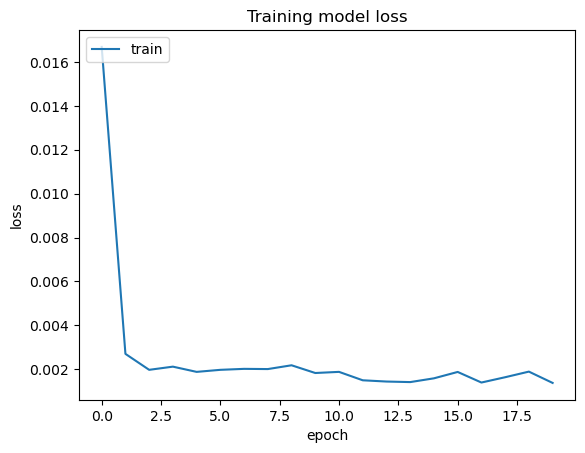

In [17]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Report :
- Loss decreased

### Validating model with test data

In [20]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.36,53.04,51.26,52.73,52.73,31868000
2019-01-03,52.53,53.31,51.12,51.27,51.27,41960000
2019-01-04,52.13,54.00,51.84,53.90,53.90,46022000
2019-01-07,54.05,54.13,53.13,53.80,53.80,47446000
2019-01-08,54.30,54.67,53.42,54.27,54.27,35414000
...,...,...,...,...,...,...
2023-02-23,91.92,91.94,89.76,90.89,90.89,41206400
2023-02-24,89.44,89.89,88.58,89.13,89.13,36585100
2023-02-27,89.87,90.16,89.34,89.87,89.87,27502300


#### Checking the null values and duplicated values

In [21]:
print(test_data.isnull().sum().sum())
print(test_data.duplicated().sum().sum())

0
0


#### Considering only the closing price as per trained data

In [23]:
test_data = test_data.iloc[:, 4:5]

In [24]:
y_test = test_data.iloc[60:,0:].values

In [26]:
# Input array for the model

inputClosing = test_data.iloc[:, 0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

(1048, 1)

#### Preparing test data

In [27]:
X_test = []
length = len(test_data)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(988, 60, 1)

#### Predicting output

In [28]:
y_pred = model.predict(X_test)
y_pred

31/31 [==============================] - 4s 68ms/step


array([[1.0103569 ],
       [1.0101817 ],
       [1.0091802 ],
       [1.0079916 ],
       [1.0071453 ],
       [1.0070422 ],
       [1.0077267 ],
       [1.0090243 ],
       [1.0106235 ],
       [1.0122961 ],
       [1.0139242 ],
       [1.0156131 ],
       [1.0174928 ],
       [1.0196811 ],
       [1.0222952 ],
       [1.0253425 ],
       [1.0288824 ],
       [1.0330768 ],
       [1.0377814 ],
       [1.0428324 ],
       [1.0481422 ],
       [1.0538146 ],
       [1.0585715 ],
       [1.0611016 ],
       [1.0606807 ],
       [1.0575756 ],
       [1.0525128 ],
       [1.0461406 ],
       [1.0389825 ],
       [1.0314816 ],
       [1.0240251 ],
       [1.016539  ],
       [1.0088397 ],
       [1.0014867 ],
       [0.99519813],
       [0.9902463 ],
       [0.98633546],
       [0.9832284 ],
       [0.98074305],
       [0.97860795],
       [0.9765386 ],
       [0.974382  ],
       [0.9718493 ],
       [0.9688239 ],
       [0.96515965],
       [0.9600061 ],
       [0.9531119 ],
       [0.944

#### Getting the real data

In [29]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[ 59.850098],
       [ 59.842144],
       [ 59.796688],
       [ 59.742737],
       [ 59.704323],
       [ 59.699642],
       [ 59.730713],
       [ 59.78961 ],
       [ 59.862198],
       [ 59.938118],
       [ 60.01202 ],
       [ 60.088676],
       [ 60.173996],
       [ 60.273323],
       [ 60.39198 ],
       [ 60.530293],
       [ 60.69097 ],
       [ 60.88135 ],
       [ 61.094894],
       [ 61.32416 ],
       [ 61.565174],
       [ 61.822647],
       [ 62.03856 ],
       [ 62.153397],
       [ 62.134296],
       [ 61.993355],
       [ 61.763554],
       [ 61.47432 ],
       [ 61.149414],
       [ 60.80895 ],
       [ 60.470497],
       [ 60.130703],
       [ 59.781235],
       [ 59.44748 ],
       [ 59.16204 ],
       [ 58.93728 ],
       [ 58.75977 ],
       [ 58.618736],
       [ 58.505924],
       [ 58.409016],
       [ 58.31509 ],
       [ 58.2172  ],
       [ 58.10224 ],
       [ 57.964916],
       [ 57.798595],
       [ 57.56468 ],
       [ 57.251747],
       [ 56.8

#### Plotting actual vs Predicted stock price

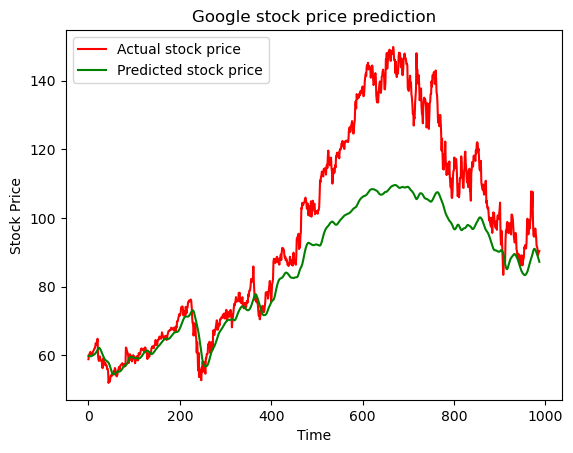

In [30]:
plt.plot(y_test, color='red', label='Actual stock price')
plt.plot(predicted_price, color='green', label='Predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()